# Linear regression model in Julia

The linear regression model consist in a linear model $$\hat y_{a,b}(x) = \mathbf a \cdot \mathbf x + b$$ that aims to be a good aproximation for a set of (features, targets),
a set of $(x, y)$ values. The $\mathbf a$ is an array and $b$ a single value; our goals are find $\mathbf a$ and $b$, and for this we can use something like a Mínimos Quadrados Ordinários (MQO), the gradient descent, among several other options.

In [8]:
# Importing the libraries
using Pkg
using Plots
using LinearAlgebra
using LaTeXStrings
using Distributions
using ForwardDiff

Let's create a discreet distribution in two-dimensional that looks like linear $P = \{(x,y) \in \mathbb{N}^2 \ \ | \ \ 1 \leq x \leq 10 \ \text{ and } \ y = x \pm 1 \}$

In [9]:
# Declaring the constants that controls the size of the array and the confidence interval.
NUMBER_OF_POINTS = 10
UNCERTAINTY_INTERVAL = 1 

1

In [10]:
# Creating the array x and y with the size "number_of_points" and with y having a little variation determined by "uncertainty_interval"
x = [i + 1 for i in 0:(NUMBER_OF_POINTS - 1)]
y = [i + (1 + (rand()*2-1)*UNCERTAINTY_INTERVAL) for i in 0:(NUMBER_OF_POINTS - 1)]

10-element Vector{Float64}:
  0.75605485708506
  2.4036531532553447
  2.411568696386783
  4.748753030709098
  4.072449379272957
  6.990099983438125
  7.441300464337831
  8.301753431746132
  9.323123246063158
 10.509050428218123

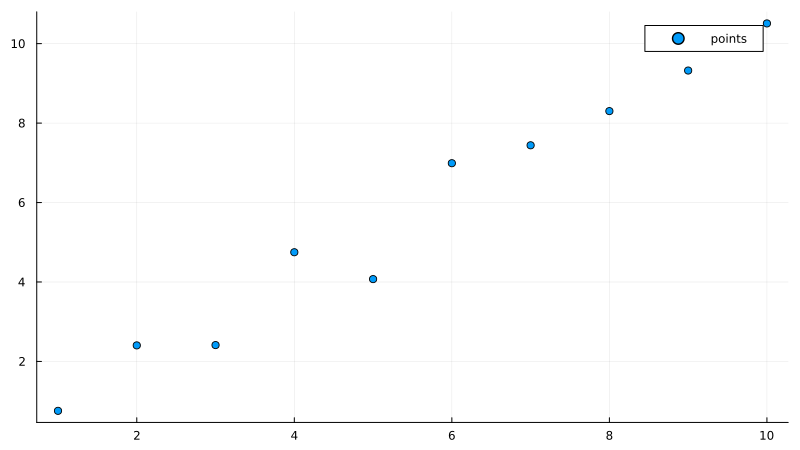

In [12]:
# The graphic of this distribution.
gr(size=(800,450))
scatter(x, y, label="points")

Defining our $\hat y = a*x + b$

In [13]:
ŷₓ(a, b) =  a * x .+ b

ŷₓ (generic function with 1 method)

$\color{red}Cost function$: Squared error cost function. Here the cost function will assume the following form: $J_x(a, b)=\dfrac{1}{2n}\sum_{i=1}^n(\hat y_x^i(a,b)-y^i)^2$

In [14]:
Jₓ(a, b) = (1/(2*NUMBER_OF_POINTS)) * sum((ŷₓ(a, b)-y).^2)
Jₓ(w::Vector) = (1/(2*NUMBER_OF_POINTS)) * sum( (ŷₓ(w[1], (w[2]))-y).^2 )
methods(Jₓ)

# 2 methods for generic function "Jₓ":
[1] Jₓ(w::Vector) in Main at /home/mack/Code/Machine_learning_implementations/Linear_regression/Linear_regression_model_Julia.ipynb:2
[2] Jₓ(a, b) in Main at /home/mack/Code/Machine_learning_implementations/Linear_regression/Linear_regression_model_Julia.ipynb:1

In [15]:
typeof([1.3,1.3])

Vector{Float64} (alias for Array{Float64, 1})

Once we want to get a goood approximation, our objective is minimaze the cost function 

## Analyzing how function J behaves with respect to $\hat y$

Passing as a parameter $\mathbf a$ five arrays where the first is composed only of numbers -1, the second of zeros, the third of 1, the fourth of 2 and the fifth of 3 and keeping the $b$ as zero

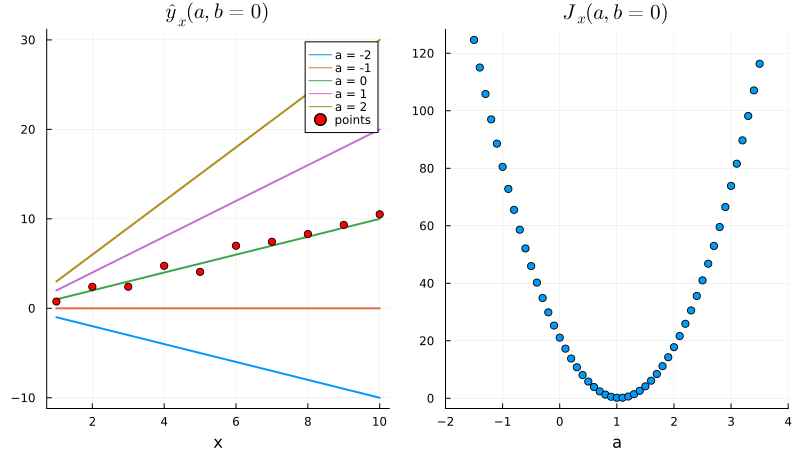

In [17]:
values = [i for i in -1:1:3]
p1 = plot(x, ŷₓ.(values, 0),
         label=["a = -2" "a = -1" "a = 0" "a = 1" "a = 2"],
         linewidth=2)
scatter!(x, y, label="points", mc=:red)
title!(L"$\hat y_x (a,b=0)$")
xlabel!("x")


values = [i for i in -1.5:0.1:3.5]
p2 = scatter(values, Jₓ.(values, 0), label=false)
title!(L"$J_x(a,b=0)$")
xlims!(-2, 4)
xlabel!("a")

             
plot(p1, p2, layout=(1,2), legend = true)

Clearly we see that the best feat happens when $\mathbf a = 1$ and at this point we can see that the $J$ is a minimum.

it is important to emphasize that for linear regression the squared error cost function will always end up giving us a bow shape or a hammock shape. But if we are not working with a linear regression or if we change the type of the cost function will we not have necessary anymore this bow shape.

## The gradient descent 

We want to find the $\min_{a,b}J_x(a,b)$, for this we:
<ol>
    <li>Give an initial a, b
    <li>Keep changing a, b to reduce J(a, b)
    <li>Until we settle at or near a minimum (sometimes we will have more the one minimum)
</ol>

The changing on the variables will be done though: $a^i \leftarrow a^i - \alpha\dfrac{\partial J(a^i)}{\partial a^i}$, with $\alpha$ being the <u>learning rate</u>.

Using the "ForwardDiff" labrarie. We have this gradient function that calculates the derivative 

In [18]:
function ∇(a, b)
    w = [a; b]
    result = ForwardDiff.gradient(Jₓ, w)
    return result[1], result[2]
end

∇ (generic function with 1 method)

In [19]:
# Just testing
∇(1, 0)

(-1.6597670373669553, -0.19578066705126118)

Creating a function that will pick the inicial values ($\mathbf a$, $b$), $\alpha$ and the number of iterations $n$ that we will do to maximize the fit of $\hat y$ and minimaze the error cost function.

Note that the parameter $\alpha$ update itself in each iteraction in order to avoid divergency.

In [20]:
function gradient_descent(a, b, αₐ, αᵦ, n)
    for n ∈ 1:n 
        a = a - αₐ.*∇(a, b)[1]
        b = b - αᵦ*∇(a, b)[2]
    end
    return a, b
end

gradient_descent (generic function with 1 method)

In [21]:
a, b = gradient_descent(10, 10, 0.001, 0.001, 10000)

(0.9163808785123412, 0.8812149699153874)

Observe that the function gradient_descent will use the function gradient $\nabla$ that use $\hat y$.

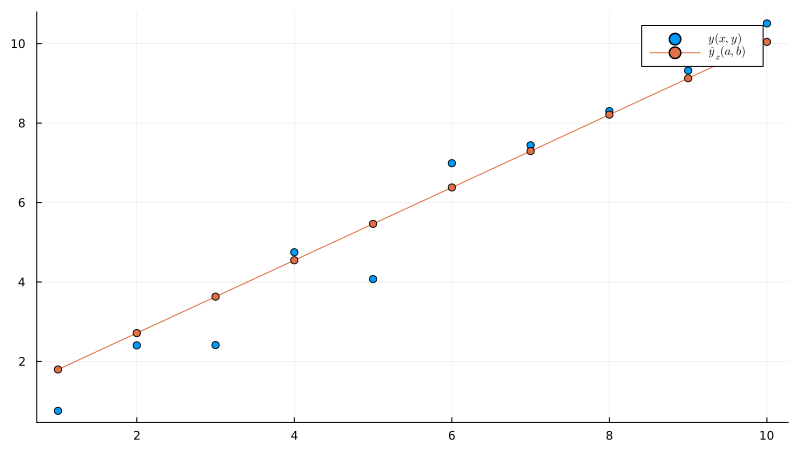

┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots /home/mack/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots /home/mack/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots /home/mack/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots /home/mack/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots /home/mack/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots /home/mack/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attr

In [22]:
scatter(x, y, label=L"y(x,y)")
plot!(x, ŷₓ(a, b), label=L"\hat y_x (a,b)", markershapes=[:circle])

At the end of the day our function $$\hat y_{a,b}(x) = a*x +b$$ becomes:

In [64]:
ŷₐᵦ(x::Number) = a*x+b

ŷₐᵦ (generic function with 2 methods)

### checking the convergence of the gradient descent

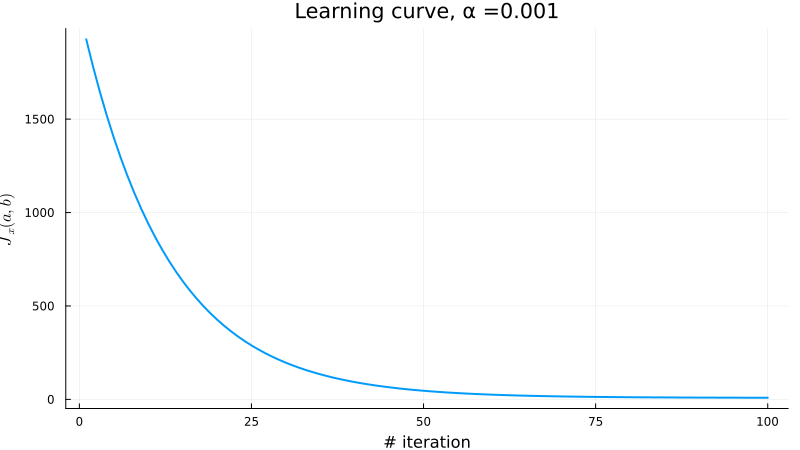

In [23]:
a = []
b = []
α = 0.001
n = range(1,100)
for i ∈ n
    push!(a, gradient_descent(10, 10, α, α, i)[1])
    push!(b, gradient_descent(10, 10, α, α, i)[2])
end

plot(n, Jₓ.(a[n],b[n]), linewidth=2, label=false)
title!("Learning curve, α =$α")
xlabel!("# iteration")
ylabel!(L"$J_x(a,b)$")